# Reinforcement Learning 101: Introduction

## Table of Content

1. Introduction
    1. Limits of Supervised and Unsupervised Learning
    2. Reinforcement Learning Concepts
    3. Environment in Python
2. Solutions
    1. Bellman Equation and Q-Learning
    2. Monte-Carlo and Temporal Difference Learning
    3. Trade-off exploration and exploitation
3. References

In [ ]:
%matplotlib inline
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets

from IPython.core.display import HTML

# Introduction

## A. Limits of Supervised and Unsupervised Learning

In [ ]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 
predicted_y = k_means.predict(X_iris)

color = ['r','b','g']
for n in range(X_iris.shape[0]):
    plt.scatter(X_iris[n,[0,1]], X_iris[n,[0,2]], color = color[predicted_y[n]]);

Supervised and Unsupervised Learning are one of the most predominant fields of research and industry application since the early 1980s. A lot of the application, such as recommender systems, churn, image recognition and voice translation, have been build on top of Supervised/Unsupervised Learning algorithms. With more data and cheaper computing power through the cloud, companies like Netflix, Airbnb and Uber have been able to become staple companies.

While some algorithms can use supervised/unsupervised learning to bring business value, it can only be applied to certain kinds of problems. To understand this concept more concretely, let us look at an example.

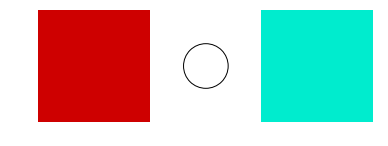

In [3]:
field = np.zeros((1,3,3))
field[0,0,0] = 50
field[0,0,1] = 0
field[0,0,2] = 0

field[0,1,0] = 1
field[0,1,1] = 1
field[0,1,2] = 1

field[0,2,0] = 0
field[0,2,1] = 20
field[0,2,2] = 50

fig = plt.gcf()
ax = fig.gca()


ballCircle = plt.Circle((1,0),0.2, color = 'k', fill = False)
plt.imshow(field, cmap = None)
ax.add_artist(ballCircle)
plt.axis('off')
ax.grid()
plt.show()

In here we have a grid, and the circle has two actions to take. Go Left or go Right. Let also say the following: if the circle gets to the turquoise block, it receives \$10. If it falls in the red block, it will have to pay a penalty of \$10 (-10). Let us also say that if the circle lands in any of these two blocks, the events ends, meaning that it cannot take any more actions.

The dataset will look like the following

In [4]:
df = pd.DataFrame({'action': ['Right','Left','Right','Right','Right'], 
              'reward': [10,-10,10,10,-10]})

df


,action,reward
0,Right,10
1,Left,-10
2,Right,10
3,Right,10
4,Right,-10


So far, very easy right? We can do a simple logistic regression and find out what is the best action to take. Now, let us complicate things just a little bit.

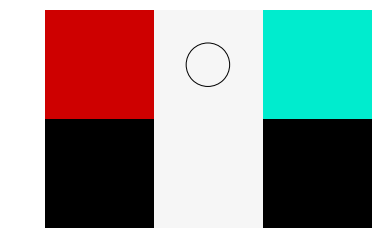

In [5]:
field = np.zeros((2,3,3))
field[0,0,0] = 50
field[0,0,1] = 0
field[0,0,2] = 0

field[0,1,0] = 10
field[0,1,1] = 10
field[0,1,2] = 10

field[1,1,0] = 10
field[1,1,1] = 10
field[1,1,2] = 10

field[0,2,0] = 0
field[0,2,1] = 20
field[0,2,2] = 50

fig = plt.gcf()
ax = fig.gca()

ballCircle = plt.Circle((1,0),0.2, color = 'k', fill = False)
plt.imshow(field, cmap = None)
ax.add_artist(ballCircle)
ax.grid()
plt.axis('off')
plt.show()

Here, the agent can take two additional actions on top of going Left or Right. It can go up and down. Also, we added a small island (second row, second column) where it can go. The black is prohibited can never enter. Another caviat is that the agent can still take actions until it reaches blue/red blocks.

This means that it can take different actions lengths. It can be "Right", "Left", "Up, Up, Right", "Up,Down,Up,Up,Down,[...], Down, Up, Right". We end up with a dataset that looks like this

In [6]:
pd.DataFrame({'action': ['Left','Up,Down,Up,Right','Left','Down,Down,Down,Up,Right','Up,Up,Left'], 
              'reward': [-10,10,10,10,-10]})

,action,reward
0,Left,-10
1,"Up,Down,Up,Right",10
2,Left,10
3,"Down,Down,Down,Up,Right",10
4,"Up,Up,Left",-10


We get data that is not uniform. The length of the input is inconsistent. And this gets worse when there are hundreds of possible moves. We end-up with possibly an infinite input, which is something that supervised/unsupervised learning cannot solve.

Another limitation is the initial conditions. What would happen if the agent is in the bottom cell at the beginning? Will it be able to find it's way out?

This is one of the many limitations that supervised/unsupervised learning has. It cannot map out a lot of these decision making processes. In order to do this kind of things, we need to look at Reinforcement Learning

## B. Reinforcement Learning

<img src="RLCycle.png" alt="Reinforcement Learning Cycle" class="center">
<center> **Figure 1**: Reinforcement Learning Cycle</center>